## ***Defining the question***

## ***Specifying the question***

In this week project, we are working with Nairobi Hospital. After conducting a clinical camp to test for hypothyroidism, the hospital has collected data on Thyroid patients and hopes to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

## ***Metric of success***

The metric of success for this project is the model accuracy. The model accuracy shows how well a particular model predicts the dependent variable when tested after training it. The accuracy will be derived using the accuracy score. An accuracy that is low shows our model fails to accurately predict the dependent variable and the data may be underfit while an accuracy of 1 is not good either since the model is overfitted. In this project, my aim is to achieve an accuracy of at least 95%.


## ***Understanding the experimental design***

The experimental design for this project is as follows:

* Loading the libraries and dataset
* Data cleaning and preparation
* Performing the Univariate analysis
* Performing the Bivariate analysis
* Performing the Multivariate analysis
* Applying the Decision tree algorithms
* Applying the Support Vector algorithms
* Making predictions using the different models
* Assesing the accuracy of the models created
* Making conclusions and challenging the solution

## ***Appropriateness of the data***

The dataset provided has provided the data on the age and sex of the patients. It also highlights both the patients that suffer from Hypothyroidism and Hyperthyroidism and if the patient is on thyroxine medication or not. The target data also has 2 classes. Therefore the dataset looks appropriate to train the model on whether a patient is suffering from hypothyroid or not.

## ***Reading the Data***

Lets start by importing the libraries that we will use

In [22]:
# Importing Libraries

import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from six import StringIO
import statsmodels.regression.quantile_regression as quant
import scipy as sp
import warnings
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')

import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

## ***Loading our dataset***

In [25]:
# Loading dataset and read it

hp = pd.read_csv('hypothyroid.csv')

In [26]:
# Viewing the the first 5 observations in our dataset

hp.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [27]:
# Viewing the last five observations in our dataset

hp.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,?


In [28]:
# Checking the number of rows and columns in the dataset

print('Hypothyroid dataset has ',hp.shape[0],'records and ',hp.shape[1], 'columns' )

Hypothyroid dataset has  3163 records and  26 columns


The dataset has 3163 rows and 26 columns

In [31]:
# Checking the columns in the dataset

hp.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [32]:
# Checking some summary information about our dataset

hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [33]:
# Checking the data types in the dataset

hp.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

All the columns in the dataset have string data types including the numerical columns.

We will address this in data cleaning.

Since we cannot run a model using strings

In [35]:
# Checking some summary statistics about our dataset

hp.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,...,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,...,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,...,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,...,2468,695,2914,249,2915,248,2916,247,2903,2903


The data has special characters (?) that need to be addressed in data cleaning

In [37]:
# Checking the unique values in each column
# Using a for loop to iterate through the dataframe, 
# finding the unique values in each column then print them out 
#
#

for column in hp.columns:                              # Iterating through each column in the dataframe
  print(column)                                        # Printing the column name
  print(hp[column].unique())                           # Printing out the unique values in each column
  print(hp[column].nunique())                          # Printing out the number of unique values in each column
  print('\n**************************************************')      # Creating a new line filled with + to separate the columns                        

status
['hypothyroid' 'negative']
2

**************************************************
age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
93

**************************************************
sex
['M' 'F' '?']
3

**************************************************
on_thyroxine
['f' 't']
2

**************************************************
query_on_thyroxine
['f' 't']
2

**************************************************
on_antithyroid_medication
['f' 't']
2

**************************************************
thyroid_surgery
['f' 't']
2

*************************************

## ***Data Cleaning***

## ***Missing Values***

In [38]:
# Checking for null values

hp.isnull().sum().sum()

0

We see that there are no null values but we had seen the special character ? in some columns.

Hence we need to change that by replacing the ? with null values then impute them.

## ***Replacing and checking Value***

In [40]:
# Replacing the ? with missing values 

hp = hp.replace(['?'], np.nan)

In [41]:
# Checking the null values after replacing the ? with nan.

hp.isnull().sum().sum()

5329

We now have null values and can now impute them on column basis

In [42]:
# Checking null values by column

hp.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [44]:
# Changing the columns dtypes so that we can inpute them
# Creating two lists, 
# A list of categorical columns
# A list of numerical columns

categorical_columns = ['sex', 'on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 
                       'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']
  
numerical_columns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI' , 'TBG']


# Using a conditional for loop to convert each columns into the right data types respectively

for col in hp.columns:
  if col in numerical_columns:
    hp[col]= pd.to_numeric(hp[col])
  
  else:
    hp[col] = hp[col].astype('category')
    
    
# checking the data types to confirm changes

hp.dtypes


status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

Now our columns are in the right data types

Imputing Missing Values

* We will use different methods for different columns
* Checking the columns with the measured values we see that in instances where the tests were not measured, there are null values
* Hence in those columns we should fill them with zero.

* for categorical columns we will fill them with mode

* while the age column will be filled with the mean

In [45]:
# Printing missing values by columns

hp.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [46]:
# Filling the missing values in the age column with mean

hp['age']= hp['age'].fillna(hp['age'].mean(), axis = 0)

In [47]:
# Filling the missing values in the sex column with mode

hp['sex']= hp['sex'].fillna(hp['sex'].mode()[0])

In [48]:
# Checking the null values in the measured columns
# Using a for loop and groupby function to confirm our observations

measured = ['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured']
unit = ['TSH','T3','TT4','T4U','FTI','TBG']

for i,j in zip(measured,unit):
 print(hp.groupby(i)[j].mean())

TSH_measured
n    NaN
y   5.92
Name: TSH, dtype: float64
T3_measured
n    NaN
y   1.94
Name: T3, dtype: float64
TT4_measured
n      NaN
y   108.85
Name: TT4, dtype: float64
T4U_measured
n    NaN
y   0.98
Name: T4U, dtype: float64
FTI_measured
n      NaN
y   115.40
Name: FTI, dtype: float64
TBG_measured
n     NaN
y   31.28
Name: TBG, dtype: float64


We see that in instances where the tests were not measured, there are null values because the tests were not taken,

hence the entry should be zero which we will use to fillna

In [50]:
# filling the measured columns with 0
measured = ['TSH','T3','TT4','T4U','FTI','TBG']

hp[measured] =hp[measured].fillna(0)

In [51]:
hp.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

## ***Duplicates***

In [52]:
# checking for duplicates
hp.duplicated().sum()

77

There are 77 duplicated columns and we will drop them.

In [53]:
# Dropping for duplicates 

hp.drop_duplicates(inplace = True)

# Confirming that we no longer have duplicates

hp.duplicated().sum()

0

## ***Outliers***

In statistics, an outlier is a data point that differs significantly from other observations.

An outlier may be due to variability in the measurement or it may indicate experimental error;

the latter are sometimes excluded from the data set.

An outlier can cause serious problems in statistical analyses.

## ***Boxplots***



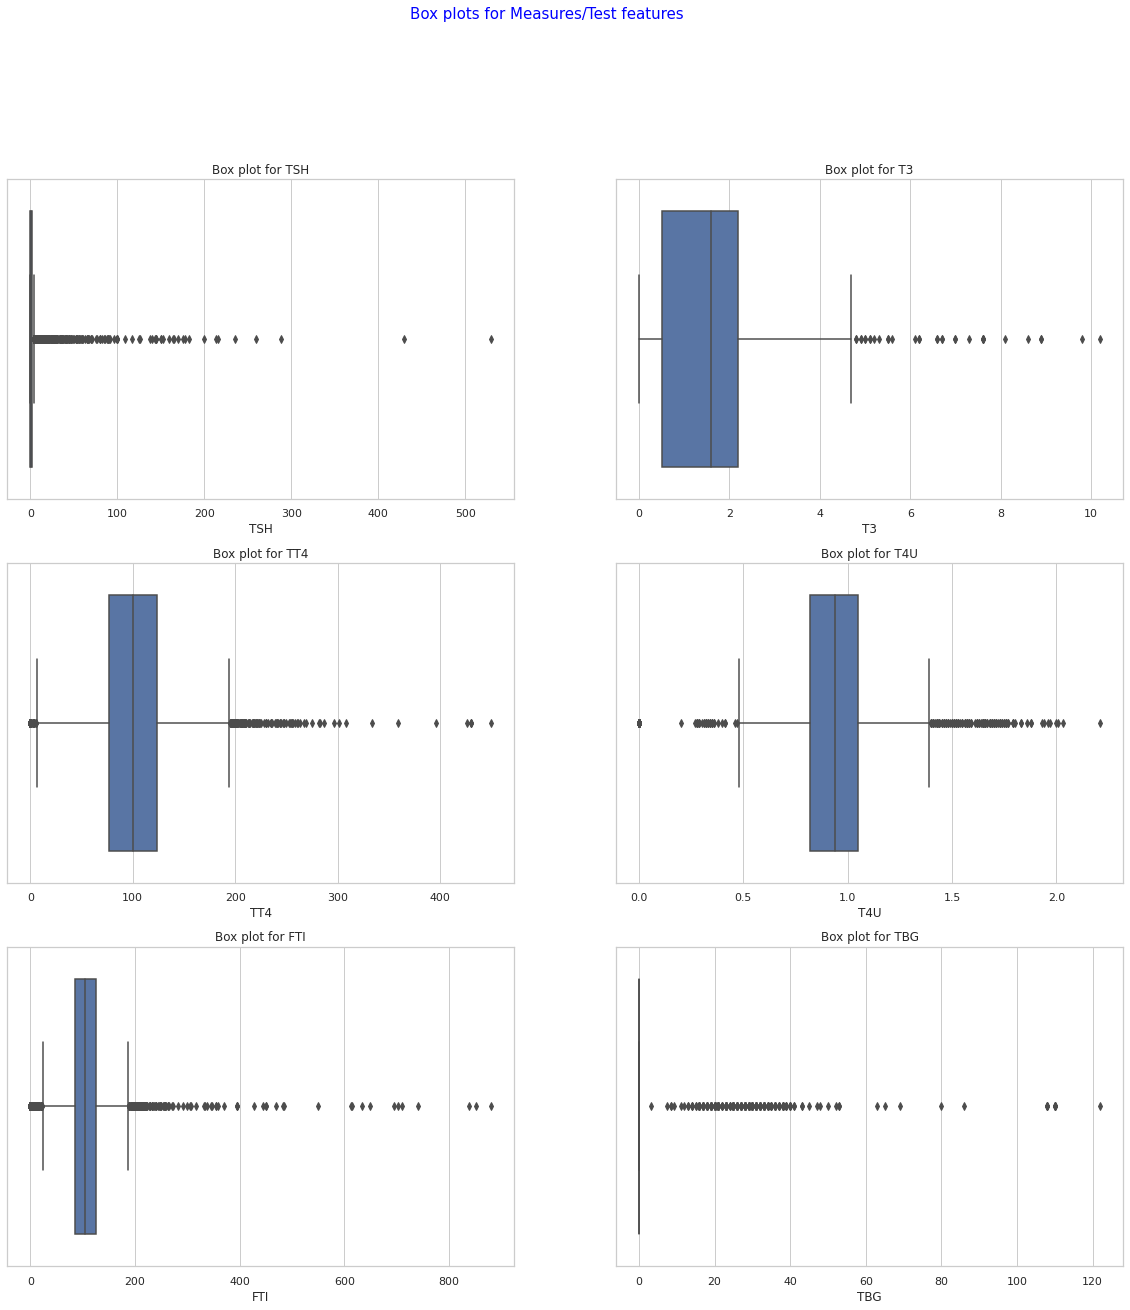

In [55]:
# We will use a boxplot to check for outliers
# we will use the list of measures/tests earlier created

# Specifying the chart we will use to plot the boxplots
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 20))

# labeling the title
fig.suptitle('Box plots for Measures/Test features', y= 1, color = 'blue', fontsize = 15)

sns.set(style = 'whitegrid', context = 'notebook')

# Using a for loop to iterate through the measured list and plot respective boxplots
for ax, data, name in zip(axes.flatten(), hp, measured):
  sns.boxplot(hp[name], ax = ax)
  ax.set_title('Box plot for '+ name)
  
plt.show()

All measured have plenty of outliers as shwon by the boxplots.

TT4, T4U and FTI have outliers on both sides of the boxplots (below Q1 and above Q4)

TSH, T3 and TBG have outliers on the right side i.e. above the Q4.

In [56]:
# We will not remove outliers for now

# we will create build a model when they are present, observe the results,

# then remove them accordingly.

## ***Exploratory Data Analysis***

## ***Univariate Analysis***

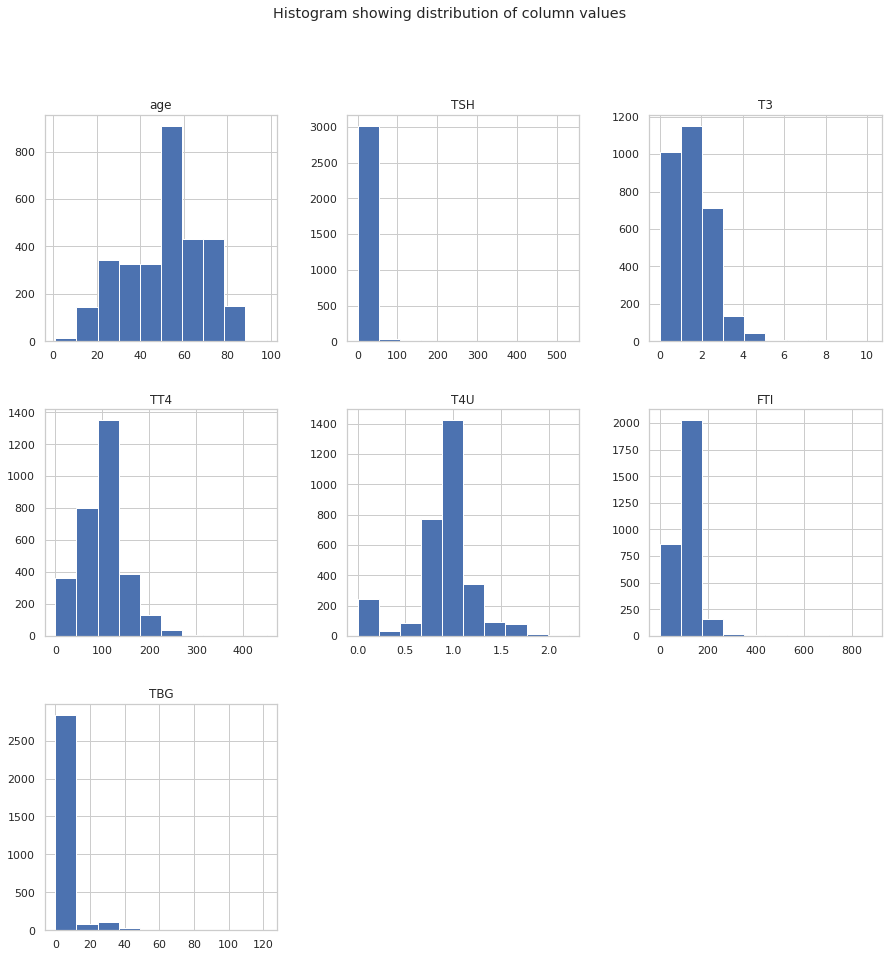

In [57]:
hp.hist(bins=10, figsize=(15,15))
plt.suptitle("Histogram showing distribution of column values")
plt.savefig('Histogram')
plt.show()

## ***Histograms***

* A common way of visualizing the distribution of a single numerical variable is by using a histogram.
* A histogram divides the values within a numerical variable into “bins”, and counts the number of observations that fall into each bin.
* By visualizing these binned counts in a columnar fashion, we can obtain a very immediate and intuitive sense of the distribution of values within a variable.

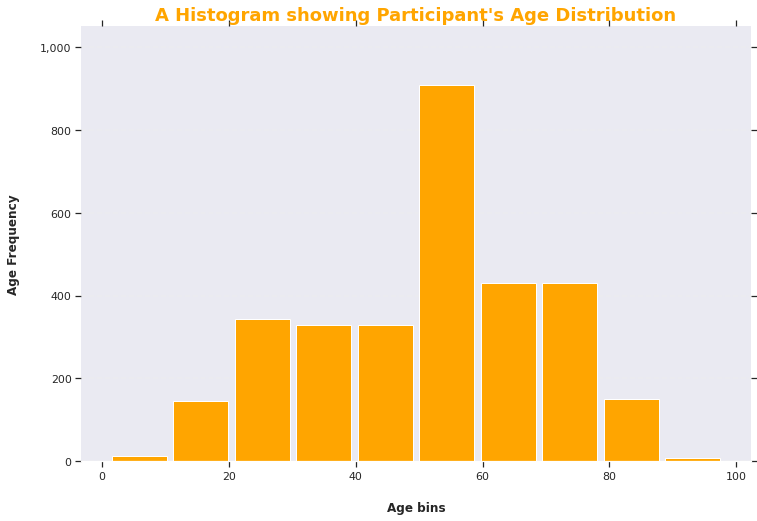

In [60]:
# A histogram of the age column
# we want to view the age distribution among the respondents from our dataset

sns.set(style = 'darkgrid')
ax = hp.hist(column='age', bins=10, grid=False, figsize=(12,8), color='orange', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Labeling the title
    x.set_title("A Histogram showing Participant's Age Distribution", color = 'Orange', size = 18,  weight='bold')

    # Set x-axis label
    x.set_xlabel("Age bins", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Age Frequency", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
   
  
# Displaying the chart
plt.show()

From the Histogram, the distribution of age is close no a normal distribution.

It is also visible that most respondents were between age 55 and 60; the tallest bin.

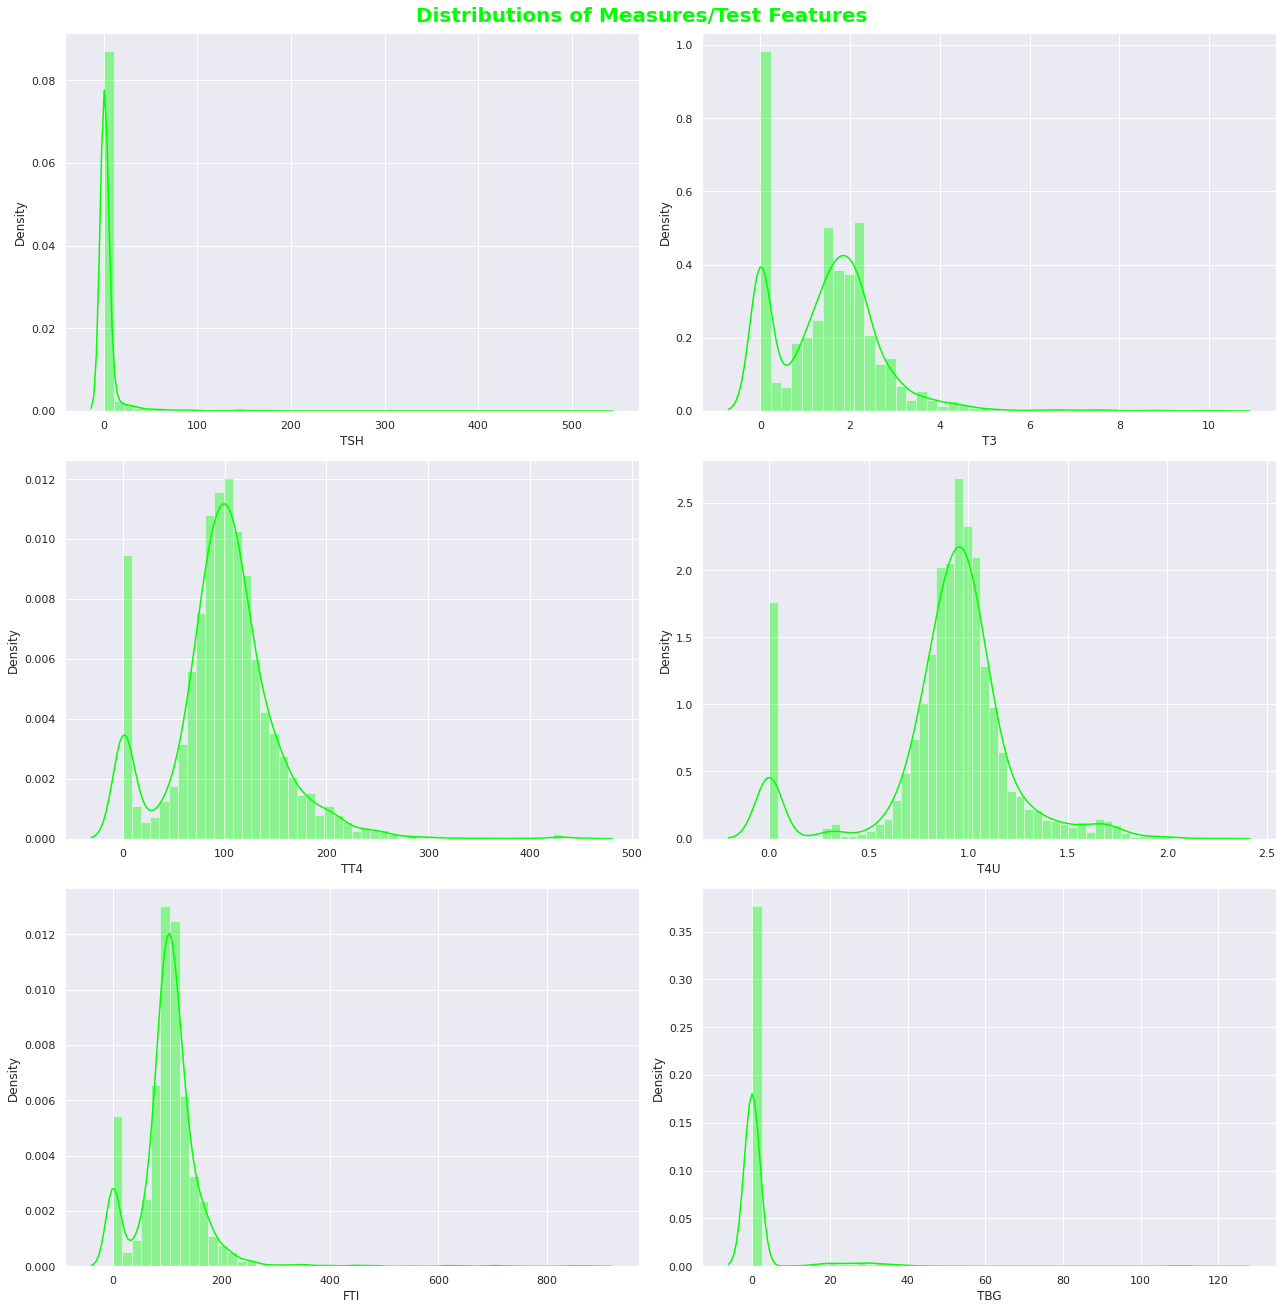

In [61]:
# Histograms of the numerical columns
# these are columns which represent measures or thyroid tests.
# First we create a list containing all the measures columns

measure_columns = ['TSH','T3','TT4','T4U','FTI','TBG']

# 
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize = (18, 18))
fig.suptitle('Distributions of Measures/Test Features', y= 1.01, color = 'lime', fontsize = 20, weight = 'bold')

for ax, data, name in zip(axes.flatten(), hp, measure_columns):
  sns.distplot(hp[name], ax = ax, kde = True, color = 'lime')
plt.tight_layout()
plt.show()

The histograms show the distribution of various features.

Most distributions are near normal but filling the missing values with zero affects the first bin in nearly all the graphs.

Ideally, filling the missing values with mean seems like the best option so as to affect the data distributions.

For modeling purposes, the distributions will remain for now.

## ***Bar Charts***

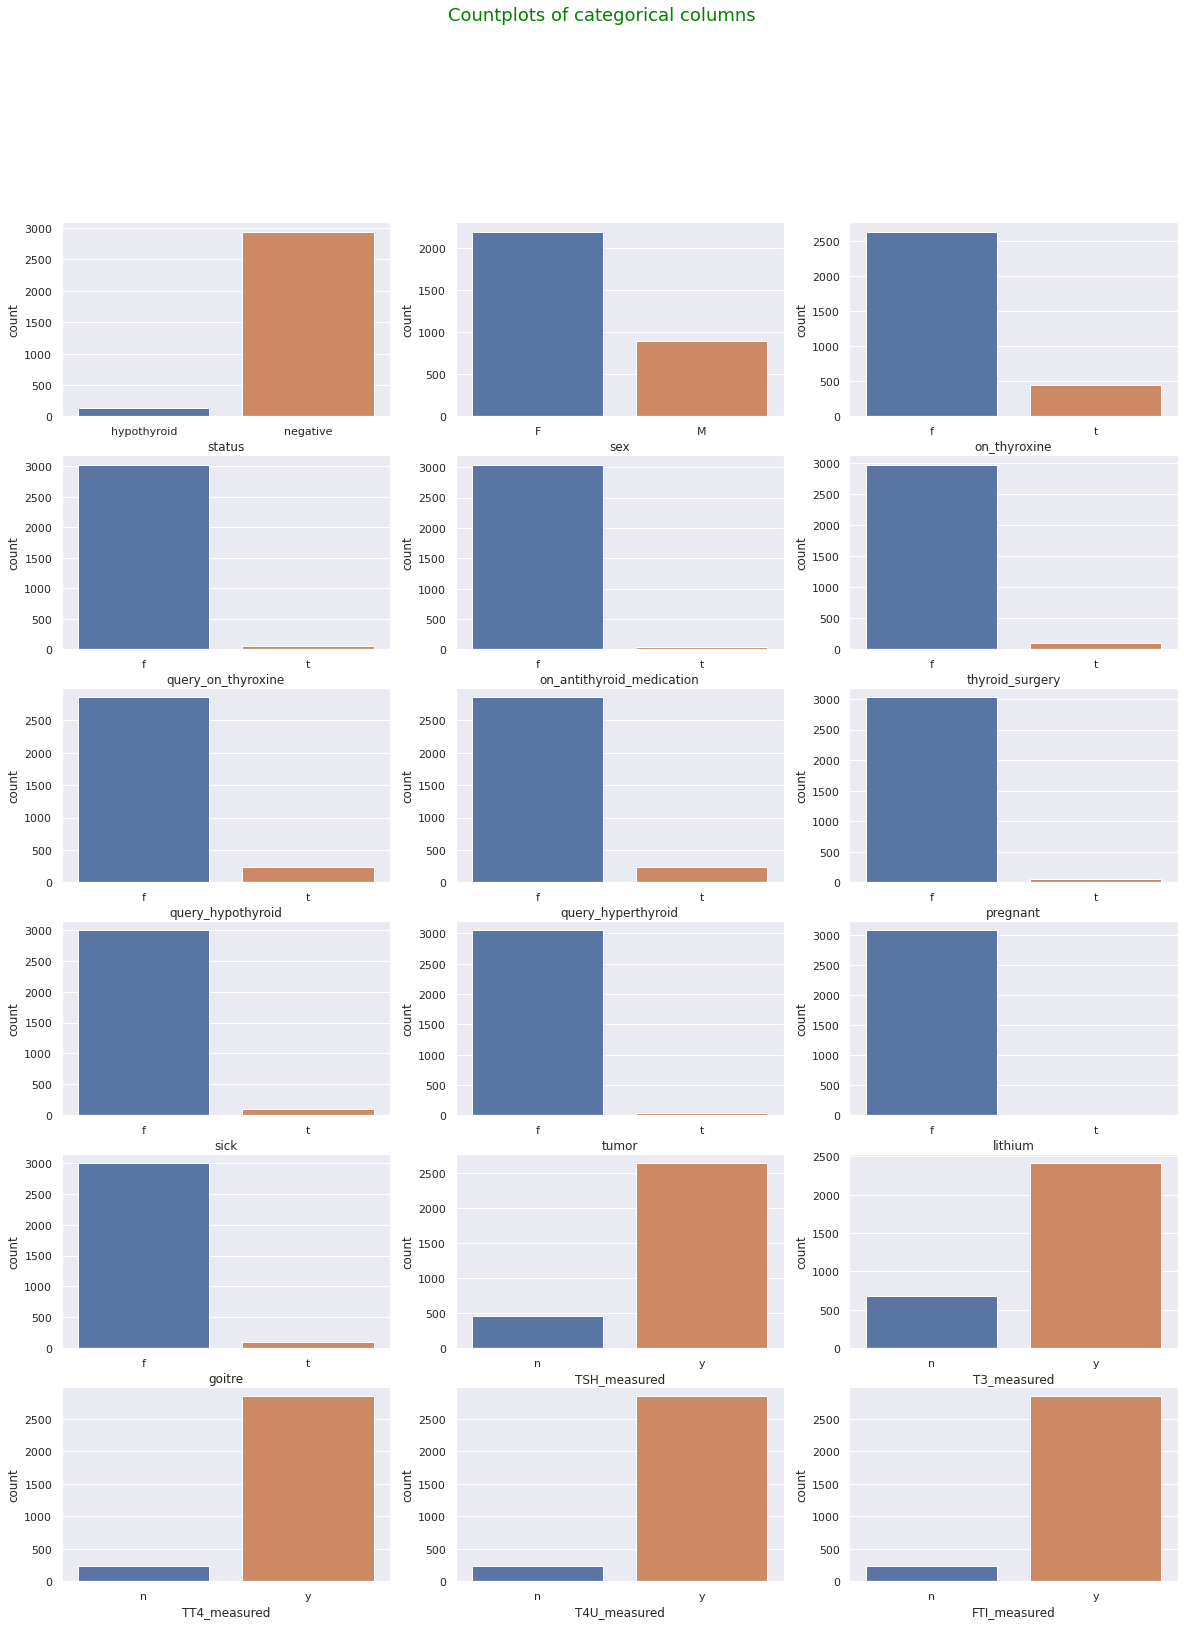

In [63]:
# Countplot of categorical columns in the dataset
# creating a list of the categorical columns in the dataset

cat=['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
      'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
      'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
      'TSH_measured', 'T3_measured', 'TT4_measured',
      'T4U_measured', 'FTI_measured', 'TBG_measured']


sns.set(style = 'darkgrid', context = 'notebook')
corr = hp.corr()
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20,25))
plt.suptitle('Countplots of categorical columns', fontsize = 18, y = 1, color = 'green')
for ax, data, column in zip(axes.flatten(), hp, cat):
   sns.countplot(hp[column], ax=ax)

From the category count plots we see that:

* This dataset is highly imbalanced;
  * as the number of people postive for hypothyroid is relatively small compared to unaffacted.
* There were more females than males

* Most people who particpated in this survey were actually sick

* Majority were not measured for the thyroid test
* Most people were not suffering from goitre
* but most actually had a tumor.

## ***Bivariate Analysis***

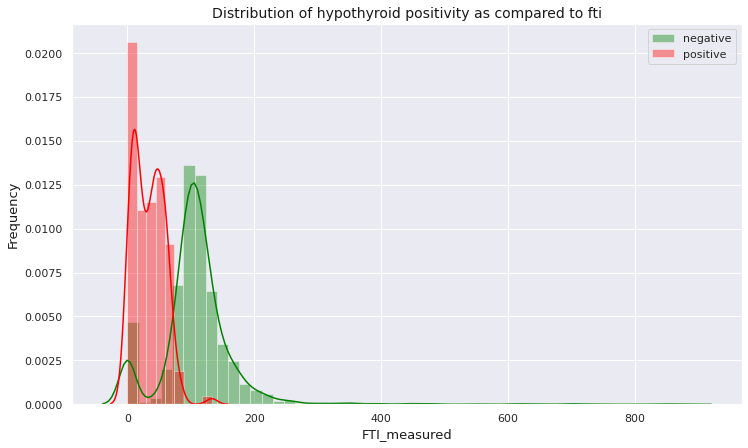

In [64]:
# Plotting histogram to show distribution of hypothyroid positivity as compared to fti
# 
negative = hp.loc[hp.status=='negative', 'FTI']    # Selecting only negative datapoints in the age column
positive = hp.loc[hp.status=='hypothyroid', 'FTI']  # Selecting only positive datapoints in the age column



# Plotting the histograms
#
plt.figure(figsize=(12,7))
sns.distplot(negative, color="green", label="negative")
sns.distplot(positive, color="red", label="positive")
plt.title('Distribution of hypothyroid positivity as compared to fti', fontsize = 14, color = 'k')
plt.xlabel('FTI_measured', fontsize = 13, color = 'k')
plt.ylabel('Frequency', fontsize = 13, color = 'k')
plt.legend()
plt.show()

We can conclude that when fti is lower, the more likely you will test positive for hypothyroid

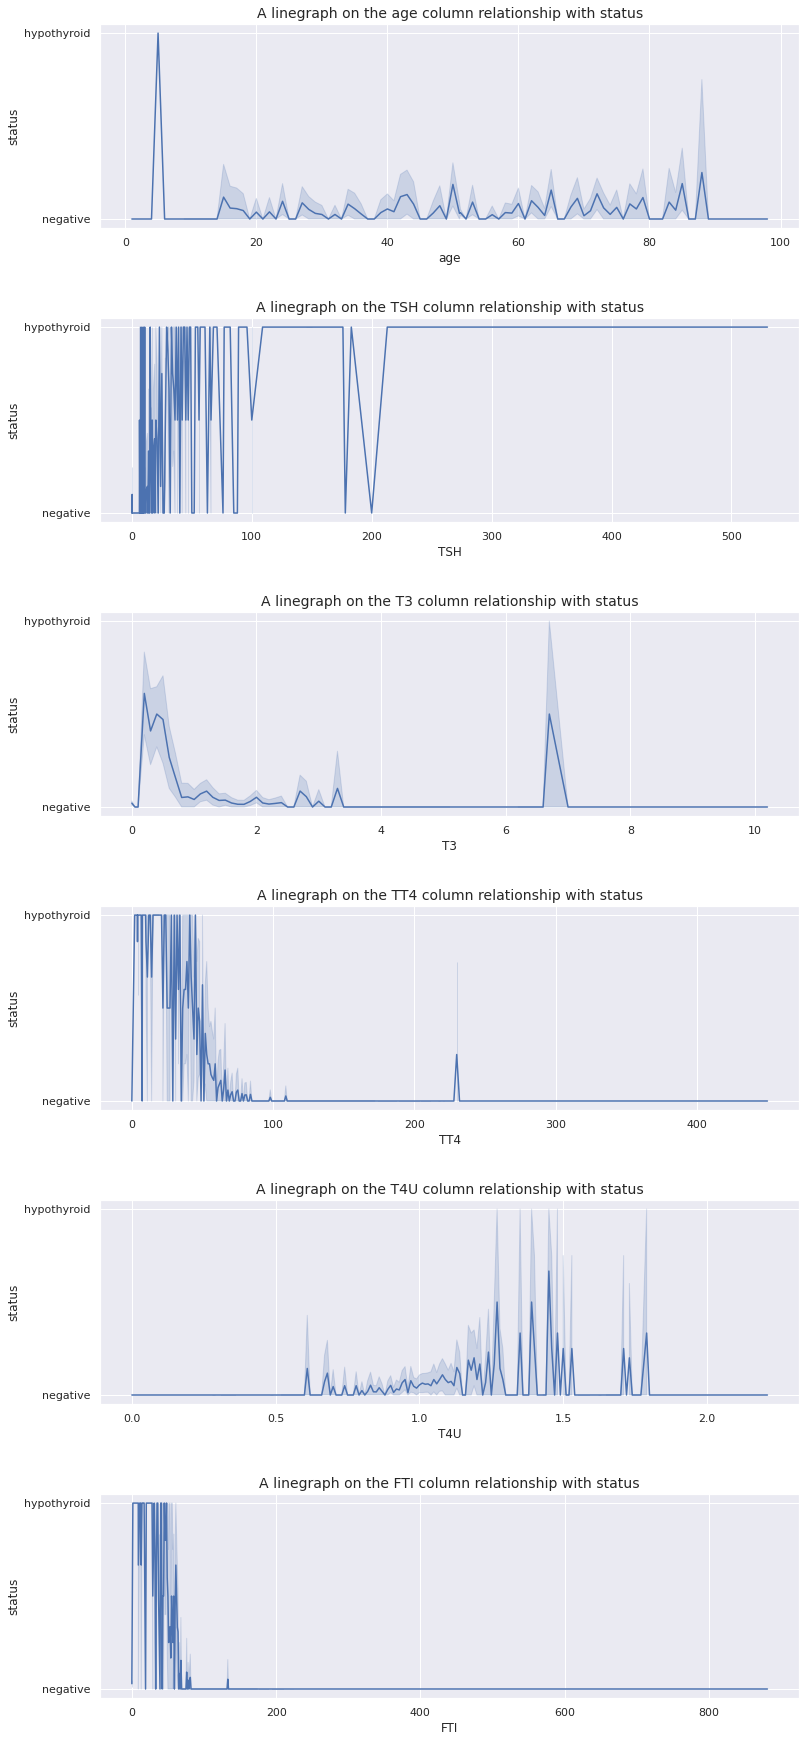

In [65]:
col_names = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]

fig, ax = plt.subplots(len(col_names), figsize = (12,25))
for i, col_val in enumerate(col_names):

    sns.lineplot(x = hp[col_val], y=hp['status'], ax=ax[i])
    ax[i].set_title('A linegraph on the {} column relationship with status'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=12)
    ax[i].figure.tight_layout(pad=3.0)
plt.show()

We can see that several columns have linear correlation

## ***HeatMap***

In [66]:
# Correlation
# This is the association between numerical variables in the dataset
# Computing the correlation matrix 

hp.corr()

# for better interpretation we will a heatmap; a visual.

,age,TSH,T3,TT4,T4U,FTI,TBG
age,1.00,0.01,-0.07,-0.00,-0.02,0.07,-0.13
TSH,0.01,1.00,-0.08,-0.22,0.10,-0.18,-0.05
T3,-0.07,-0.08,1.00,0.49,0.46,0.33,-0.30
TT4,-0.00,-0.22,0.49,1.00,0.60,0.76,-0.44
T4U,-0.02,0.10,0.46,0.60,1.00,0.20,-0.61
FTI,0.07,-0.18,0.33,0.76,0.20,1.00,-0.38
TBG,-0.13,-0.05,-0.30,-0.44,-0.61,-0.38,1.00


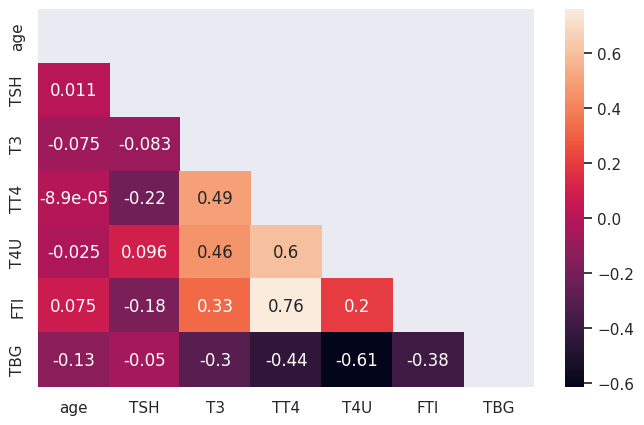

In [67]:
# Ploting a heatmat
# using seaborn 
# 

sns.set(style = 'darkgrid', context = 'notebook')
corr = hp.corr()
plt.figure(dpi = 100, figsize = (8,5))
heatmap = np.zeros_like(hp.corr(), dtype=np.bool)
heatmap[np.triu_indices_from(heatmap)] = True
sns.heatmap(hp.corr(), annot=True, mask=heatmap)
plt.show()

The strongly correlated variables include: T4U and TT4; FTI and TT4.

We will investigate them while perfoming feature importance

## ***Multivariate Analysis***

## ***PairPlot***

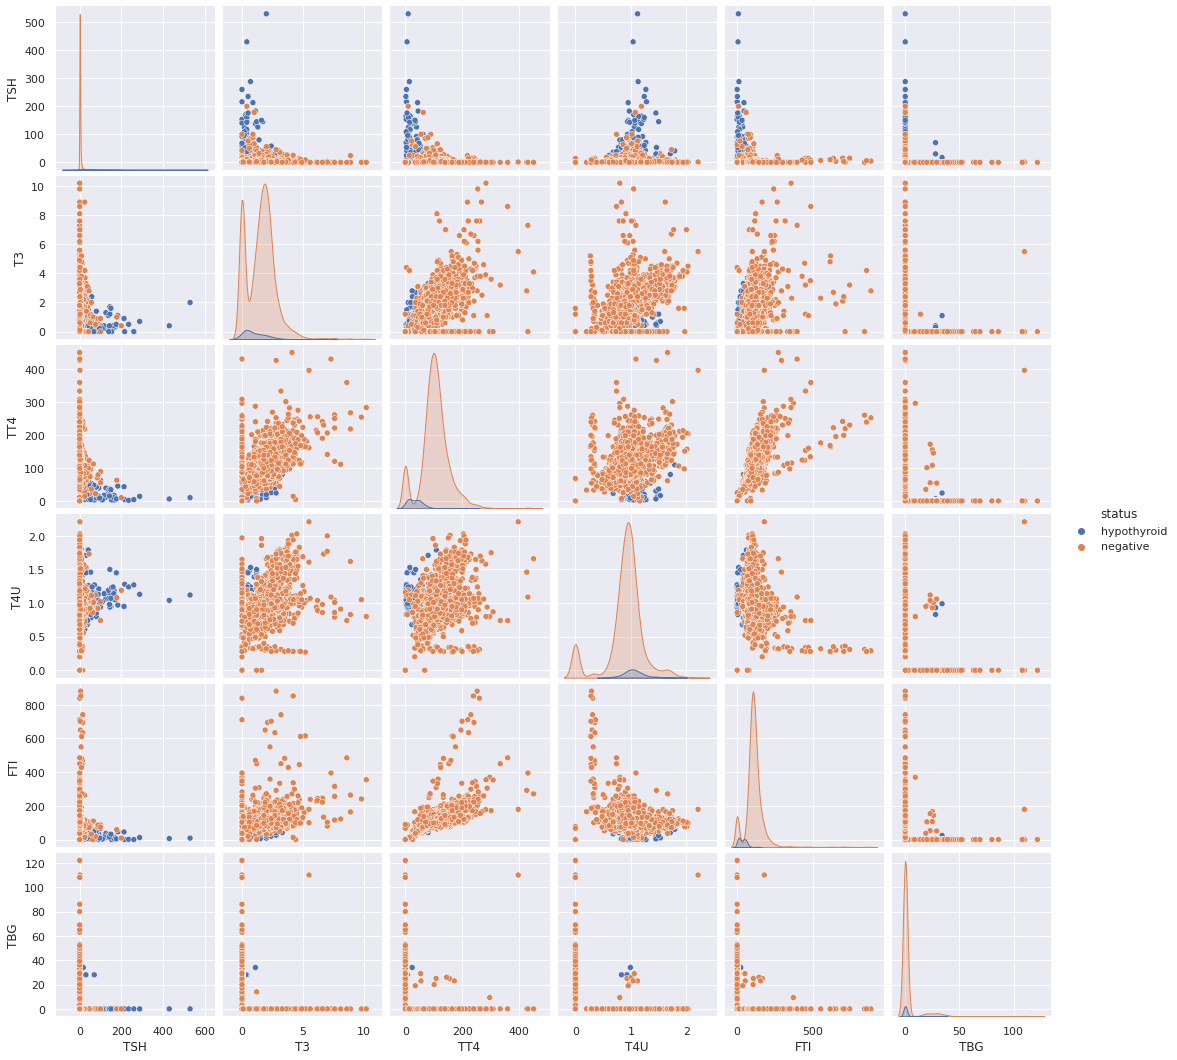

In [68]:
# A pairplot
# Here we want visualize scatter plots of features with the argument 'hue' 
# distinguishing when the condition (hpyothyroidism) is negative or postive

measure_columns = ['TSH','T3','TT4','T4U','FTI','TBG']

sns.pairplot(hp, kind="scatter", diag_kind="kde", vars=measure_columns, hue="status")
plt.show()

The pairplot shows that TSH plotted against other variables offers a fairly good distint of the target varible classes.

We will find if this is an insight when carrying out feature importance in random forest.

also, its clear that this classification problem might not linearly separable.

We might need to use the rbf kernel increases the features dimension for distinction.

## ***MODELING***

## ***Part 1***

## ***Random Forest***

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging.

The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees

Moreover, it is a pretty good indicator of the importance it assigns to your features.

The most important parameters to tune

* Maximum depth
* Minimum sample splits
* Node creation factor
* Number of features to use
* Number of trees to create

In [69]:
# To create our model, we first split our data:

# Splitting the data into Features set and Labels

X= hp.drop('status', axis = 1)


# Getting dummies for the feature sets
# Most are categorical and need to be in numerical before training

X = pd.get_dummies(X)

# Encoding the target variable from strings to numericals
           
y = hp.status.cat.codes

# Splitting the data again into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
 
# Fitting the model, making predictions and evaluating the model

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split=10, max_depth=5)

forest = forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

accuracy_score(y_test, y_pred)

0.990280777537797

The model is 99% accurate.

This model is too good. It could be overfitting.

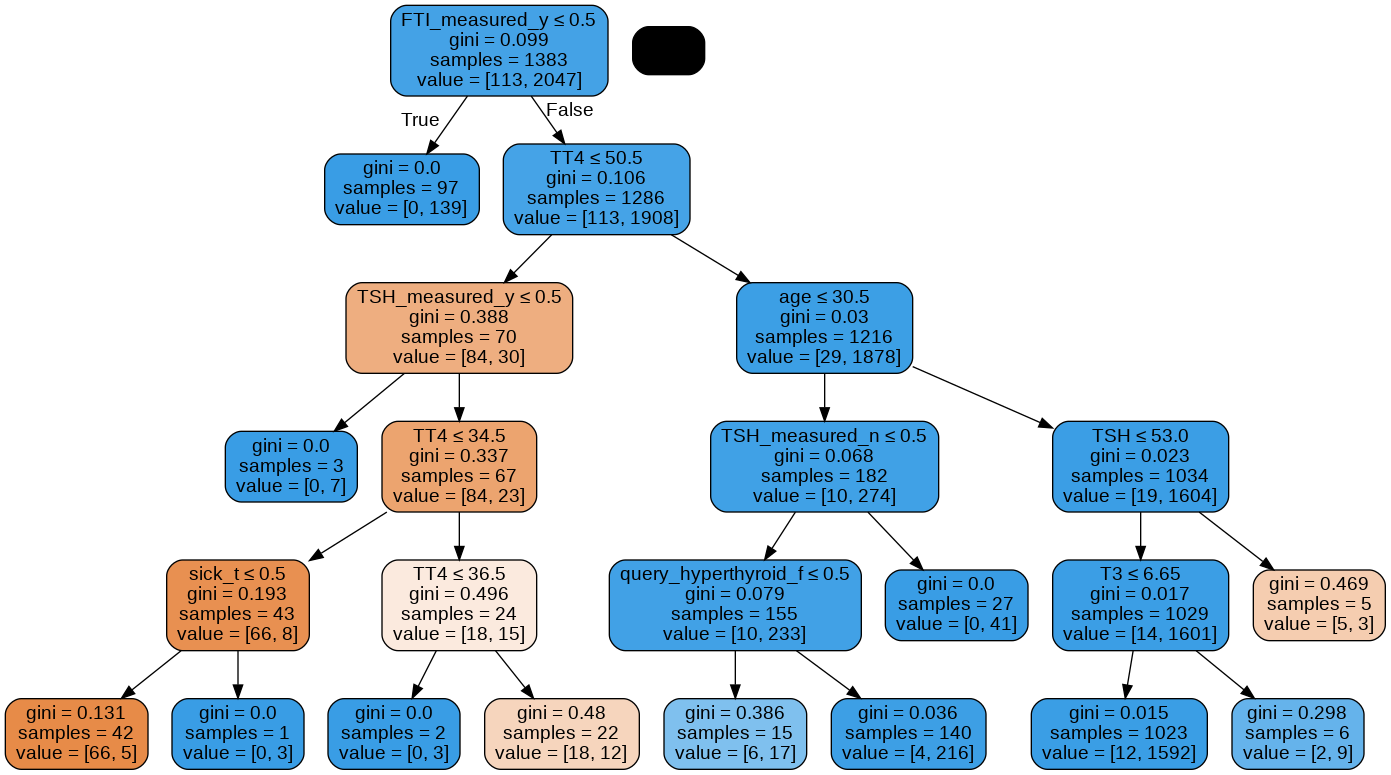

In [70]:
# Visualizing tree number 20

from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
from IPython.display import Image  


y_pred = forest.predict(X_test)
dot_data = StringIO()

# picking a specific tree from the forest; tree  number 20
tree = forest.estimators_[20]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid_Test.png')
Image(graph.create_png())


In [71]:
# Feature importance

# Get numerical feature importances
importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

# printing feature inportances
print(feature_importances) 
print()

# Sorting the values in descending order, since we want to see the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0), ('TSH', 0.04), ('T3', 0.0), ('TT4', 0.84), ('T4U', 0.0), ('FTI', 0.0), ('TBG', 0.0), ('sex_F', 0.0), ('sex_M', 0.0), ('on_thyroxine_f', 0.0), ('on_thyroxine_t', 0.0), ('query_on_thyroxine_f', 0.0), ('query_on_thyroxine_t', 0.0), ('on_antithyroid_medication_f', 0.0), ('on_antithyroid_medication_t', 0.0), ('thyroid_surgery_f', 0.0), ('thyroid_surgery_t', 0.0), ('query_hypothyroid_f', 0.0), ('query_hypothyroid_t', 0.0), ('query_hyperthyroid_f', 0.02), ('query_hyperthyroid_t', 0.0), ('pregnant_f', 0.0), ('pregnant_t', 0.0), ('sick_f', 0.0), ('sick_t', 0.03), ('tumor_f', 0.0), ('tumor_t', 0.0), ('lithium_f', 0.0), ('lithium_t', 0.0), ('goitre_f', 0.0), ('goitre_t', 0.0), ('TSH_measured_n', 0.0), ('TSH_measured_y', 0.06), ('T3_measured_n', 0.0), ('T3_measured_y', 0.0), ('TT4_measured_n', 0.0), ('TT4_measured_y', 0.0), ('T4U_measured_n', 0.0), ('T4U_measured_y', 0.0), ('FTI_measured_n', 0.0), ('FTI_measured_y', 0.01), ('TBG_measured_n', 0.0), ('TBG_measured_y', 0.0)]

Variable:

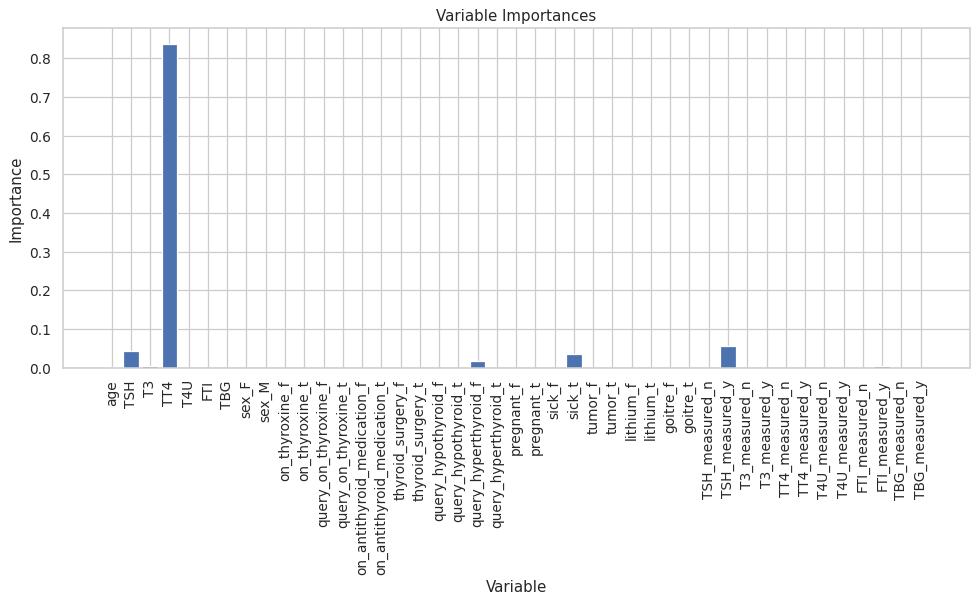

In [72]:
# list of Features and their importances for plotting
# Specifying the grid size and display for easier viewing

sns.set(style = 'whitegrid')

plt.figure(dpi = 90, figsize = (13,5))

x_values = list(range(len(importances)))

# Making a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Labels and ticks for x axis
plt.xticks(x_values, X.columns, rotation= 'vertical')

# Labeling y axis and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

The plot shows the most important features in predicting whether a person is hypothyroid or not.

* the most import feature is TT4 test which accounts for 84% of the total feature importance
* Other factors include TSH and sick people.

In [73]:
# Using the TT4 feature only to build a prediction model

# Splitting the data into Features set and Labels

X= hp.TT4.values.reshape(-1,1)

# Encoding the target variable from strings to numericals
           
y = hp.status.cat.codes

# Splitting the data again into training and test sets   

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)


# Fitting the model, making predictions and evaluating the model

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split=10, max_depth=5)

forest = forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

accuracy_score(y_test, y_pred)

0.9762419006479481

The model yeilds 97.6 accuracy using the most important feature TT4.

This is lower compared to the model with all other features.

## ***Gradient boosting Classifier***

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

Gradient boosting is a greedy algorithm and can overfit a training dataset quickly.

It can benefit from regularization methods that penalize various parts of the algorithm and generally improve the performance of the algorithm by reducing overfitting.

Parameters to tune

* Maximum depth
* Minimum sample splits
* Node creation factor
* Learning rate
* Number of trees to create

In [74]:
# Splitting the data into Features set and Labels

X= hp.drop('status', axis = 1)


# Getting dummies for the feature sets
# Most are categorical and need to be in numerical before training

X = pd.get_dummies(X)

# Encoding the target variable from strings to numericals
           
y = hp.status.cat.codes

# Splitting the data again into training and test sets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

gbc = GradientBoostingClassifier(n_estimators= 200, learning_rate=0.1, max_depth=3, 
                                 min_samples_split=10)
# Fitting the model, making predictions and evaluating the model

gbc = gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)

accuracy_score(y_test, y_pred_gbc)

0.9956803455723542

The model yielded 99.4% accuracy slightly higher than Random Forest Classifier model. But still this might be overfitting.

## ***Ada Boost Classifier***

AdaBoost, short for Adaptive Boosting.

AdaBoost rarely suffers from overfitting problems in low noise data cases.

However, recent studies with highly noisy patterns have clearly shown that overfitting can occur.

Ada-boost, like Random Forest Classifier is another ensemble classifier.

(Ensemble classifier are made up of multiple classifier algorithms and whose output is combined result of output of those classifier algorithms).

* --Parameters to tune
  * Parameters of one initial tree
  * Number of trees to create

In [76]:
# Splitting the data into Features set and Labels

X= hp.drop('status', axis = 1)


# Getting dummies for the feature sets
# Most are categorical and need to be in numerical before training

X = pd.get_dummies(X)

# Encoding the target variable from strings to numericals
           
y = hp.status.cat.codes

# Splitting the data again into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

# Fitting the model, making predictions and evaluating the model

adc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=300)
                         

adc = adc.fit(X_train, y_train)

y_pred = adc.predict(X_test)

accuracy_score(y_test, y_pred)

0.9946004319654428

The Ada Boost Classifier yielded 99.4% accuracy just like Gradient Boosting.

Still the model is too good and seems like overfitting

## ***PART 2***

## ***Support Vector Machine***

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane.

In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples.

--- Parameters to tune:

      * Kernel
      * C
      * Gamma
Creating SVC using different kernels

Using Linear kernel

In [77]:
# Splitting the data into Features set and Labels

X= hp.drop('status', axis = 1)


# Getting dummies for the feature sets
# Most are categorical and need to be in numerical before training

X = pd.get_dummies(X)

# Encoding the target variable from strings to numericals
           
y = hp.status.cat.codes

# Splitting the data again into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

# Fitting the model, making predictions and evaluating the model

svc = SVC(kernel = 'linear',  C = 1, gamma = 0.001)

svc.fit(X_train, y_train)


y_pred = svc.predict(X_test)

accuracy_score(y_test, y_pred)

0.9892008639308856

The SVC model using linear kernel yielded 98.9% accuracy.

Using a polynomial kernel

In [78]:
# Splitting the data into Features set and Labels

X= hp.drop('status', axis = 1)


# Getting dummies for the feature sets
# Most are categorical and need to be in numerical before training

X = pd.get_dummies(X)

# Encoding the target variable from strings to numericals
           
y = hp.status.cat.codes

# Splitting the data again into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

# Fitting the model, making predictions and evaluating the model

svc = SVC(kernel = 'poly', C = 1, gamma = 0.001)

svc.fit(X_train, y_train)


y_pred = svc.predict(X_test)

accuracy_score(y_test, y_pred)

0.9913606911447084

The SVC model using polynomial kernel yielded 99.1% accuracy.

This is slightly higher compared to the model using a linear kernel.

Using rbf kernel

In [81]:
# Splitting the data into Features set and Labels

X= hp.drop('status', axis = 1)


# Getting dummies for the feature sets
# Most are categorical and need to be in numerical before training

X = pd.get_dummies(X)

# Encoding the target variable from strings to numericals
           
y = hp.status.cat.codes

# Splitting the data again into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

# Fitting the model, making predictions and evaluating the model

svc = SVC(kernel = 'rbf', C = 1, gamma = 0.001)

svc.fit(X_train, y_train)


y_pred = svc.predict(X_test)

accuracy_score(y_test, y_pred)

0.9848812095032398

The SVC model using radial basis funtion (rbf) kernel yielded 98.5% accuracy.

This is the lowest accuracy compared to the other two kernels.

## ***Tuning Support Vector Classifier***

In [83]:
# We already know that the polynomial kernel perform best for this partical classification problem.

# Here we will use Randomized search to find the best parameters for the model

# Creating a dictionary
# Specifying the parameters we want to tune

params = {'C': [0.001, 0.01, 0.1, 1, 10],
          'gamma': [0.001, 0.01, 0.1, 1]}

svc = SVC()

search = RandomizedSearchCV(estimator = svc, 
                      param_distributions = params, 
                      scoring = 'accuracy',
                      n_jobs = 1, 
                      cv = 10 )
                
                
search.fit(X,y)
search.best_params_

{'C': 1, 'gamma': 0.001}

The output shows the best parameters which are C: 1 and Gamma : 0.001.

We wil fit them in the model using polynmial kernel and observe changes.

Before tunning the SVC (kernel = 'poly') the accuracy was 97%

After using the best parameters, the accuracy improved to 99.1%

Visualizations

* Using two variables only: TSH and TT4 from feature importances by Random Forests.

In [85]:
# Splitting the data into Features set and Labels

X= hp[['TSH','TT4']].values

# Encoding the target variable from strings to numericals
           
y = hp.status.cat.codes

# Splitting the data again into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

svc = SVC(kernel = 'poly', C = 1, gamma = 0.001)

svc = svc.fit(X_train, y_train)

# Fitting the model, making predictions and evaluating the model
y_pred = svc.predict(X_test)

accuracy_score(y_test, y_pred)

0.9665226781857451

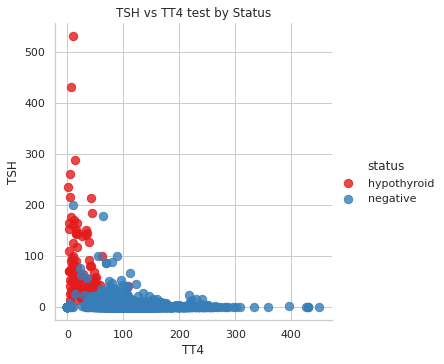

In [86]:
# Plotting our desired features
# Using lmplot and seaborn 
# Displaying the chart

sns.lmplot('TT4','TSH', data=hp, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.title('TSH vs TT4 test by Status')
plt.show()

The plot shows the two important features of interest: TSH vs TT4 and how they distingusish hyperthyroid.

From the plot the classes can not be distinguished linearly.

## ***Challenging the Solution***

## ***Fitting SVC model with Sigmoid function***

I will try the results using another kernel in SVC classifier; sigmoid.

The sigmoid function returns 0 and 1 hence its the best for binary classification.

In [87]:
# Splitting the data into Features set and Labels

X= hp[['TSH','TT4']].values

# Encoding the target variable from strings to numericals
           
y = hp.status.cat.codes

# Splitting the data again into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

# Fitting the model, making predictions and evaluating the model

svc = SVC(kernel = 'sigmoid', C = 1, gamma = 0.001)

svc = svc.fit(X_train, y_train)


y_pred = svc.predict(X_test)

accuracy_score(y_test, y_pred)

0.9568034557235421

Using Sigmoid the model yielded 95.6% accuracy.

This is a little bit lower compared to the polynomial kernel using the same two features.

## ***Fitting XGBoost model***

In [88]:
# Splitting the data into Features set and Labels

X= hp[['TSH','TT4']].values

# Encoding the target variable from strings to numericals
           
y = hp.status.cat.codes

# Splitting the data again into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

xg = xgb.XGBClassifier() 

xg.fit(X_train, y_train)

# Fitting the model, making predictions and evaluating the model

y_pred = svc.predict(X_test)

accuracy_score(y_test, y_pred)

0.9568034557235421

The XG Boost model yielded 95.6% accuracy just like the sigmoid kernel in SVC model.

This is a little bit lower compared to the polynomial kernel using the same two features.

## ***Conclusion***

* Overall the best model was Support Vector Classifier using the polynomial kernel at 96% accuracy.

* For the Ensemble methods: Gradient Boosting and Ada Boost Classifier models performed best with 99.4% accuracy.

* The most important features to use for the prediction were TT4 and TSH measures.

* There were several instances of overfitting.

* This may have been caused by inadequate data to train the models.

* Several regularization techniques were applied for example the C parameter in the Support Vector Classifier.

## **[Github Link](https://github.com/stephane-evrard/DataScience_Core_WK8.git)**